# Uczenie nadzorowane - klasyfikacja
----
#### Opracował: Kacper Książek ( 417564 )
W ramach przedmiotu **Uczenie Maszynowe**.

In [8]:
import pandas as pd
from random import seed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

seed(417564)

### 1. Wczytaj zbiór danych

In [9]:
columns = [
    "Class", "Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash",
    "Magnesium", "Total_phenols", "Flavanoids", "Nonflavanoid_phenols",
    "Proanthocyanins", "Color_intensity", "Hue", "OD280_OD315", "Proline"
]

data = pd.read_csv("./dane/wine.data", header=None, names=columns)

data.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Opis kolumn w zbiorze danych 🍷🤖

Ten krotki opis kolumn zostal wygenerowany przez AI, zeby lepiej zrozumiec, co oznacza kazda cecha w zbiorze danych wina:

- **Class** — klasa wina (1, 2 lub 3), czyli typ szczepu
- **Alcohol** — zawartosc alkoholu
- **Malic_acid** — kwas jabłkowy
- **Ash** — zawartosc popiołu
- **Alcalinity_of_ash** — zasadowosc popiołu
- **Magnesium** — poziom magnezu
- **Total_phenols** — laczna zawartosc fenoli
- **Flavanoids** — flavonoidy, rodzaj fenoli
- **Nonflavanoid_phenols** — fenole niebędace flavonoidami
- **Proanthocyanins** — proantocyjaniny (antyoksydanty)
- **Color_intensity** — intensywnosc koloru
- **Hue** — odcien koloru
- **OD280_OD315** — absorbancja przy falach 280 i 315 nm (cecha chemiczna)
- **Proline** — poziom proliny, aminokwas

### 2. Podziel zbiór danych na zbiór treningowy i testowy, dodatkowo w zmiennej X zapisz macierz zmiennych niezależnych, w zmiennej Y zapisz wektor zawierający informacje o tym jaki jest to typ wina (1, 2, 3).

In [10]:
X = data.drop("Class", axis=1)
Y = data["Class"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(f"Rozmiar X_train: {X_train.shape}")
print(f"Rozmiar X_test: {X_test.shape}")
print(f"Rozmiar Y_train: {Y_train.shape}")
print(f"Rozmiar Y_test: {Y_test.shape}")

Rozmiar X_train: (124, 13)
Rozmiar X_test: (54, 13)
Rozmiar Y_train: (124,)
Rozmiar Y_test: (54,)


### 3. Dokonaj normalizacji danych. Skomentuj po co jest ten krok i jak może on wpływać na działania algorytmów z kolejnego punktu.

Normalizacja to przeskalowanie cech do podobnego zakresu (np. 0 do 1 lub srednia 0, odchylenie 1).
Dzieki temu algorytmy uczace sie szybciej i stabilniej, bo nie "faworyzuja" cech o duzych wartosciach.

Przyklad: Alkohol i Proline maja rozne skale, wiec bez normalizacji model moze zle interpretowac ich wplyw

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print(f"Srednia po normalizacji (X_train): {X_train_scaled.mean(axis=0)}")
print("\n")
print(f"Odchylenie po normalizacji (X_train): {X_train_scaled.std(axis=0)}")

Srednia po normalizacji (X_train): [-1.70652023e-15  1.13932161e-16  1.33092462e-15 -2.82032462e-17
  2.33460205e-16  5.09001443e-16  1.14155996e-17  4.26853893e-16
 -4.23496363e-16  5.83762429e-16  5.28251278e-17  2.72183709e-16
  5.01391043e-17]


Odchylenie po normalizacji (X_train): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### 4. Wykonaj trening dla algorytmów KNeighborsClassifier oraz RandomForestClassifier (biblioteka scikit-learn):




Krotki opis uzytych w tym punkcie algorytmów:
- **KNeighborsClassifier (KNN)** — model bazujacy na odleglosci miedzy probkami, szuka najblizszych sasiadow,
- **RandomForestClassifier (RF)** — zespol drzew decyzyjnych, dziala jak "las" wielu drzew, poprawiajac dokladnosc i stabilnosc.

Wczesniejsza normalizacja danych jest szczegolnie wazna dla KNN (bo korzysta z odleglosci), a dla RF mniej (moze dzialac tez na surowych danych).

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(random_state=42)

knn.fit(X_train_scaled, Y_train)       # KNN na danych znormalizowanych
rf.fit(X_train, Y_train)               # RF na danych oryginalnych (bez normalizacji)

RandomForestClassifier(random_state=42)

### 5. Wykonaj predykcję.


In [13]:
Y_pred_knn = knn.predict(X_test_scaled)
Y_pred_rf = rf.predict(X_test)

acc_knn = accuracy_score(Y_test, Y_pred_knn)
acc_rf = accuracy_score(Y_test, Y_pred_rf)

print(f"Dokladnosc KNN: {acc_knn:.4f}")
print(f"Dokladnosc Random Forest: {acc_rf:.4f}")

Dokladnosc KNN: 0.9630
Dokladnosc Random Forest: 1.0000


### 6. Zapoznaj się z metrykami dostępnymi w: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics. Opisz o czym mówią i w jakim kontekście używamy: accuracy, precision, recall and F-measures, confusion matrix oraz napisz czym jest classification report.

![RG Table](./docs/6_rg_table.png)

W opisie wszystkich metryk ponizej, szczegolnie czesto przewijac beda sie nastepujace terminy:

- **True Positive (TP)**: Poprawnie sklasyfikowana pozytywna probka (np. zdrowa osoba jako zdrowa).
- **True Negative (TN)**: Poprawnie sklasyfikowana negatywna probka (np. chora osoba jako chora).
- **False Positive (FP)**: Błędnie sklasyfikowana pozytywna probka (np. zdrowa osoba jako chora).
- **False Negative (FN)**: Błędnie sklasyfikowana negatywna probka (np. chora osoba jako zdrowa).

W celu lepszego wytlumaczenia terminow wyzej, posluze sie graficznym przykladem z diagnostyki medycznej:

![type_one_or_type_two_error](./docs/type_one_or_two_error.png)

Aby lepiej zrozumiec, jak oceniamy skutecznosc modeli klasyfikacyjnych, zapoznajmy sie z podstawowymi metrykami dostepnymi w bibliotece scikit-learn:

---

## 📌 Accuracy (dokladnosc)

**Definicja:**
Accuracy to stosunek liczby poprawnych przewidywan do lacznej liczby probek.

**Zastosowanie:**
Accuracy jest przydatna, gdy klasy sa zbalansowane. W przypadku nierownych klas moze byc mylaca, poniewaz model moze osiagac wysoka dokladnosc, przewidujac tylko dominujaca klase.

---

## 🎯 Precision (precyzja)

**Definicja:**
Precision to stosunek liczby prawdziwych pozytywnych do wszystkich przewidywanych pozytywnych.

**Zastosowanie:**
Precision jest wazna, gdy zalezy nam na minimalizacji fałszywych alarmow. Na przyklad, w diagnostyce medycznej, chcemy uniknac sytuacji, w ktorej zdrowa osoba zostanie błędnie zdiagnozowana jako chora.

---

## 🔍 Recall (czulosc)

**Definicja:**
Recall to stosunek liczby prawdziwych pozytywnych do wszystkich rzeczywistych pozytywnych.


**Zastosowanie:**
Recall jest wazna, gdy zalezy nam na wykryciu jak najwiekszej liczby pozytywnych przypadkow. Na przyklad, w wykrywaniu chorob, chcemy zidentyfikowac jak najwiecej chorych osob, nawet kosztem wiekszej liczby fałszywych alarmow.

---

## ⚖️ F1-Score

**Definicja:**
F1-Score to srednia harmoniczna precyzji i czulosci.

![f1](./docs/6_f1.png)

**Zastosowanie:**
F1-Score jest przydatna, gdy zalezy nam na zbalansowaniu precyzji i czulosci. Jest to szczegolnie wazne w przypadkach, gdy obie metryki sa istotne, np. w analizie danych medycznych.

---

## 🧩 Confusion Matrix (macierz pomylek)

**Definicja:**
Confusion Matrix to tabela przedstawiajaca liczbe prawdziwych i fałszywych przewidywan dla kazdej klasy.

![confusion_matrix](./docs/6_confusion_matrix_intro.png)

*Table 1. Confusion matrix with advanced classification metrics*

**Zastosowanie:**
Macierz pomylek pozwala na szczegolowa analize wynikow klasyfikacji, identyfikujac, ktore klasy sa czesto mylone.

![confusion_matrix_example](./docs/6_confusion_matrix_example.png)

*Table 2. Confusion matrix of email classification

---

## 📄 Classification Report

**Definicja:**

Gotowe podsumowanie wynikow klasyfikacji generowane przez `sklearn.metrics.classification_report`. Zawiera kluczowe metryki dla kazdej klasy osobno oraz metryki globalne, co bardzo ulatwia interpretacje jak dobrze dziala nasz model.

### Co zawiera raport? 🔍

Dla **kazdej klasy osobno** otrzymujemy:

| Metryka       | Znaczenie                                                                 |
|---------------|--------------------------------------------------------------------------|
| **Precision** | Jaka czesc przewidywan dla tej klasy byla trafna (czyli TP / (TP + FP))  |
| **Recall**    | Jaka czesc rzeczywistych przypadkow tej klasy zostala wykryta (TP / (TP + FN)) |
| **F1-score**  | Harmoniczna srednia precision i recall – zbalansowana metryka            |
| **Support**   | Liczba probek danej klasy w zbiorze testowym                             |

➡️ Dodatkowo pod spodem pojawiaja sie metryki **srednie (macro, weighted)**:

| Srednia       | Znaczenie                                                                 |
|---------------|--------------------------------------------------------------------------|
| **Macro avg** | Srednia niezważona metryk dla wszystkich klas (ignoruje liczebnosc klas) |
| **Weighted avg** | Srednia wazona metryk wedlug liczebnosci klas (bardziej realistyczna)   |


![classification_report](./docs/6_classification_report.png)

- Support: liczba rzeczywistych wystapien danej klasy w zbiorze danych.

**Zastosowanie:**
Raport klasyfikacji dostarcza kompleksowego obrazu skutecznosci modelu dla kazdej klasy, co pozwala na lepsza interpretacje wynikow.


-----
Referencje:

- Analyzing the Leading Causes of Traffic Fatalities Using XGBoost and Grid-Based Analysis: A City Management Perspective - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix_fig3_336402347 [accessed 25 May 2025]
- What is Confusion Matrix and Advanced Classification Metrics? Available from: https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html [accessed 25 May 2025]
- Breaking Down the Classification Report from Scikit-Learn - NBD Lite #6 - Available from: https://www.nb-data.com/p/breaking-down-the-classification [accessed 25 May 2025]


### 7. W nawiązaniu do metryk omawianych na wykładzie i tych analizowanych w punkcie 6. dokonaj analizy predykcji poszczególnych modeli.


🔍 Accuracy:
KNN: 0.96
Random Forest: 1.00

📄 Classification Report – KNN:
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       1.00      0.90      0.95        21
           3       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

📄 Classification Report – Random Forest:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



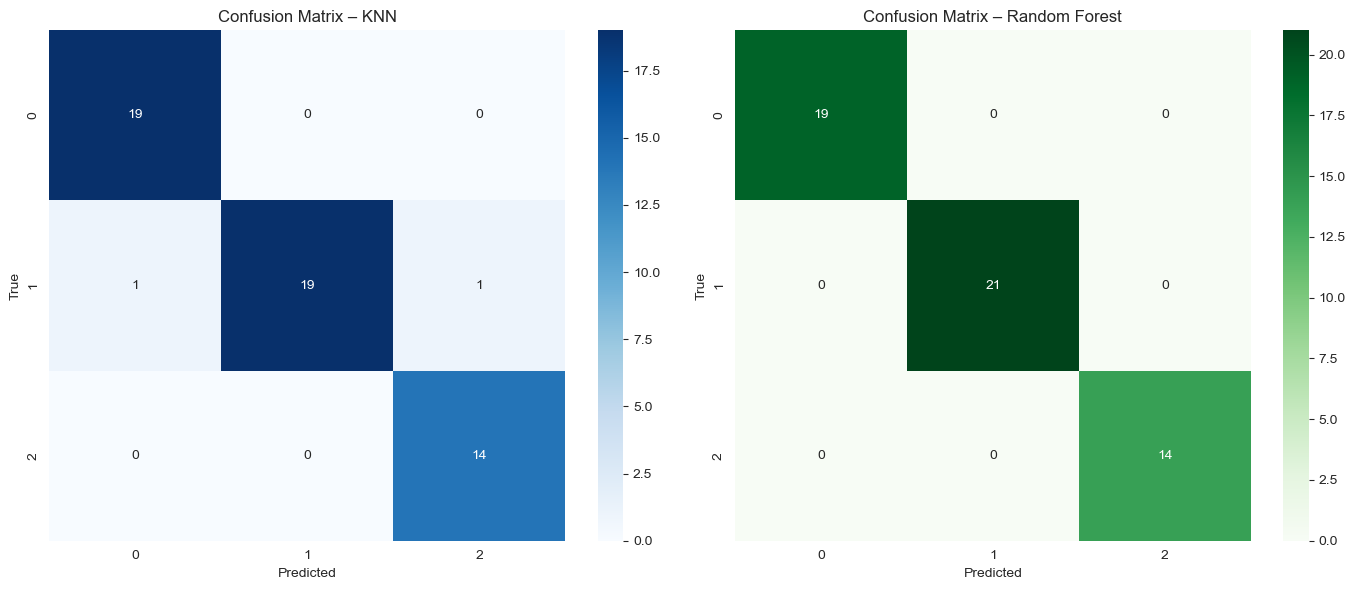

In [14]:
# Accuracy
print("🔍 Accuracy:")
print(f"KNN: {accuracy_score(Y_test, Y_pred_knn):.2f}")
print(f"Random Forest: {accuracy_score(Y_test, Y_pred_rf):.2f}\n")

# Classification Reports
print("📄 Classification Report – KNN:")
print(classification_report(Y_test, Y_pred_knn))
print("📄 Classification Report – Random Forest:")
print(classification_report(Y_test, Y_pred_rf))

# Confusion matrices
cm_knn = confusion_matrix(Y_test, Y_pred_knn)
cm_rf = confusion_matrix(Y_test, Y_pred_rf)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix – KNN')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Confusion Matrix – Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

plt.tight_layout()
plt.show()

### 8. Napisz interpretację wynikającą z analizy metryk - w szczególności z czego może wynikać różnica w działaniu tych dwóch modeli.

#### 8.1 📌 Interpretacja wynikow klasyfikacji – KNN vs Random Forest

Na podstawie metryk z poprzedniego punktu mozemy sformulowac kilka istotnych wnioskow:

##### ✅ Accuracy – ogolna trafnosc
- **KNN** uzyskal wynik **96%**, co oznacza, ze 96% probek zostalo poprawnie sklasyfikowanych.
- **Random Forest** osiagnal **100%**, czyli nie pomylil sie ani razu w przypadku testowego zbioru danych.

##### 📄 Precision, Recall, F1-score – skutecznosc per klasa
- W modelu **KNN**:
  - Klasa **2** zostala nieco slabiej rozpoznana (`recall = 0.90`), czyli nie wszystkie przyklady klasy 2 zostaly poprawnie rozpoznane – model mogl je pomylic z innymi klasami.
- **Random Forest** dla kazdej klasy osiagnal idealne wyniki (`precision = recall = f1 = 1.00`) – model bardzo dobrze dopasowal sie do danych.


#### 8.2 🔍 Skad moga wynikac roznice w dzialaniu modeli?

##### 🧭 KNN (K-Nearest Neighbors)
- To algorytm oparty na **odleglosci** – decyzja podejmowana jest na podstawie najblizszych sasiadow.
- Jest **czuly na skale i rozklad danych**, dlatego wczesniejsza normalizacja byla kluczowa.
- Moze miec trudnosci, gdy klasy sa blisko siebie w przestrzeni cech – wtedy latwiej o pomylki (np. w klasie 2).

##### 🌲 Random Forest
- Wykorzystuje wiele drzew decyzyjnych (ensemble learning), ktore glosuja na wynik – dzieki temu:
  - Lepiej radzi sobie z **niestandardowymi rozkladami danych**,
  - Jest **mniej podatny na szum** i **lepiej generalizuje**.
- W tym przypadku: dane byly dobrze uporzadkowane, wiec RF bez problemu dopasowal sie do wzorcow w danych.


#### 8.3 ✨ Podsumowanie
- **Random Forest** sprawdzil sie lepiej – osiagnal **perfekcyjna klasyfikacje**.
- **KNN** rowniez radzi sobie bardzo dobrze, ale ma pewne ograniczenia w rozroznianiu klas, gdy sa one blisko siebie.
- W realnych przypadkach warto analizowac nie tylko accuracy, ale rowniez precision, recall i F1-score dla kazdej klasy osobno 📊